In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score

np.random.seed(42)

# Simulated dataset
n = 500
actual_default = np.random.binomial(1, 0.15, size=n)  # 15% actual default rate
predicted_pd = np.clip(np.random.beta(2, 10, size=n), 0, 1)  # model PD predictions

df_model = pd.DataFrame({
    'Actual_Default': actual_default,
    'Predicted_PD': predicted_pd
})
df_model.head()


,Actual_Default,Predicted_PD
0,0,0.113649
1,1,0.062748
2,0,0.028024
3,0,0.308850
4,0,0.305459


In [2]:
df_model['Predicted_Default'] = (df_model['Predicted_PD'] > 0.5).astype(int)


In [3]:
cm = confusion_matrix(df_model['Actual_Default'], df_model['Predicted_Default'])
accuracy = accuracy_score(df_model['Actual_Default'], df_model['Predicted_Default'])
auc = roc_auc_score(df_model['Actual_Default'], df_model['Predicted_PD'])

print("Confusion Matrix:\n", cm)
print(f"\nAccuracy: {accuracy:.3f}")
print(f"ROC-AUC Score: {auc:.3f}")


Confusion Matrix:
 [[417   0]
 [ 83   0]]

Accuracy: 0.834
ROC-AUC Score: 0.467


In [4]:
FP = cm[0,1]
FN = cm[1,0]
loss = (FN * 10) + (FP * 1)

print(f"False Positives: {FP}, False Negatives: {FN}")
print(f"Estimated Financial Impact of Model Errors: ₹{loss} million")


False Positives: 0, False Negatives: 83
Estimated Financial Impact of Model Errors: ₹830 million


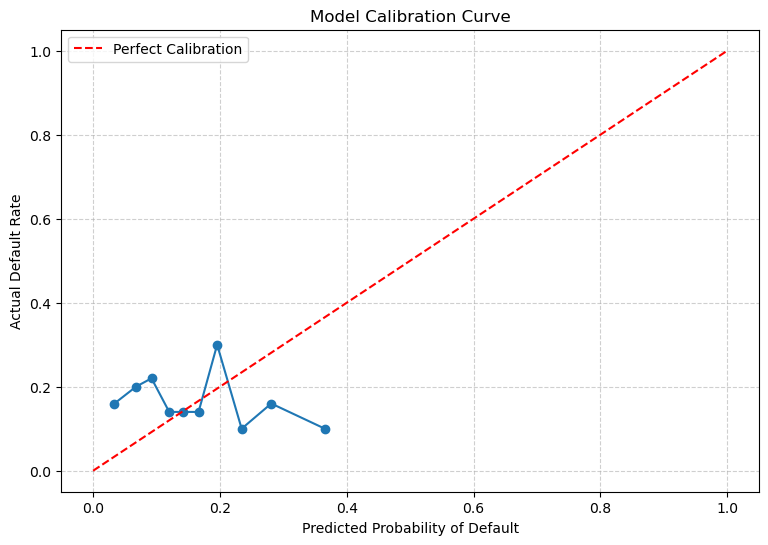

In [5]:
df_model['PD_Bin'] = pd.qcut(df_model['Predicted_PD'], 10, labels=False)
calibration = df_model.groupby('PD_Bin').agg({'Predicted_PD':'mean','Actual_Default':'mean'})

plt.figure(figsize=(9,6))
plt.plot(calibration['Predicted_PD'], calibration['Actual_Default'], marker='o')
plt.plot([0,1], [0,1], '--', color='red', label='Perfect Calibration')
plt.title('Model Calibration Curve')
plt.xlabel('Predicted Probability of Default')
plt.ylabel('Actual Default Rate')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
